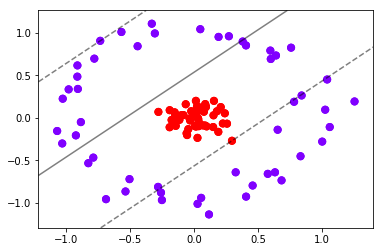

In [8]:
#如果放到jupyter notebook中运行
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_circles
X,y = make_circles(100, factor=0.1, noise=.1, random_state=10)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow");

def plot_svc_decision_function(model,ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x) 
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    Z = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, Z,colors="k",levels=[-1,0,1],alpha=0.5,linestyles=["--","-","--"])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    plt.show()

clf = SVC(kernel = "linear").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)

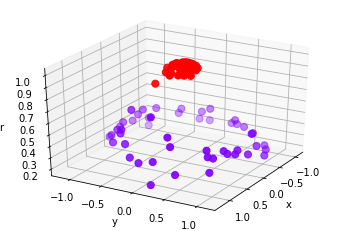

In [9]:
from mpl_toolkits import mplot3d
r = np.exp(-(X**2).sum(1))

def plot_3D(elev=30,azim=30,X=X,y=y):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap='rainbow')
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("r")
    plt.show()

from ipywidgets import interact,fixed
interact(plot_3D,elev=[0,30],azip=(-180,180),X=fixed(X),y=fixed(y))
plt.show()